In [1]:
import requests
import json


res = requests.get('https://opendata.corona.go.jp/api/Covid19JapanAll?dataName=%E6%9D%B1%E4%BA%AC%E9%83%BD')
data = json.loads(res.text)
list = data['itemList']
len(list)

828

In [2]:
import pandas as pd
df = pd.read_json(json.dumps(list))
df.head()

,date,name_jp,npatients
0,2022-07-28,東京都,2064970
1,2022-07-27,東京都,2024564
2,2022-07-26,東京都,1995528
3,2022-07-25,東京都,1963935
4,2022-07-24,東京都,1941548


In [3]:
from prophet import Prophet

df1 = df.rename(columns={'date': 'ds', 'npatients': 'y'})
m1 = Prophet()
m1.fit(df1)
future1 = m1.make_future_dataframe(periods=90)
forecast1 = m1.predict(future1)


/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
08:32:18 - cmdstanpy - INFO - Chain [1] start processing
08:32:19 - cmdstanpy - INFO - Chain [1] done processing


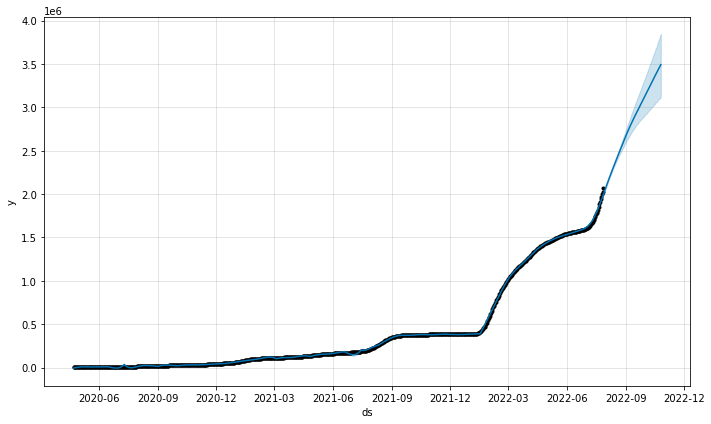

In [4]:
fig1 = m1.plot(forecast1)

In [5]:
m2 = Prophet(changepoint_range=1, changepoint_prior_scale=0.1)
m2.fit(df1)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)

08:32:31 - cmdstanpy - INFO - Chain [1] start processing
08:32:31 - cmdstanpy - INFO - Chain [1] done processing


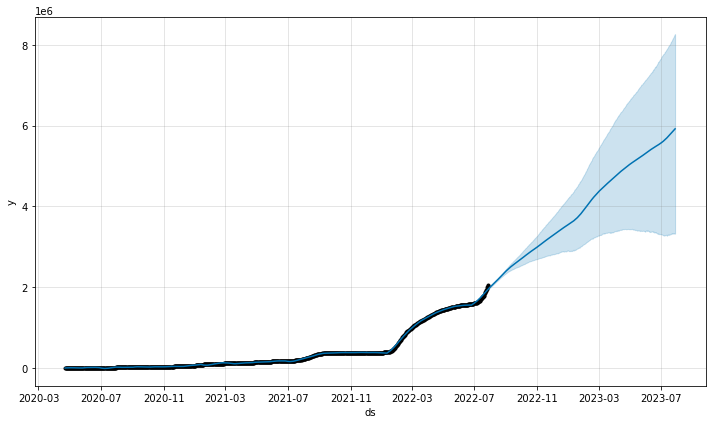

In [6]:
fig2 = m2.plot(forecast2)